In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

mscaler = MinMaxScaler()
orde = OrdinalEncoder(dtype=np.int8) 
ohe = OneHotEncoder(dtype=np.int8, sparse_output=False)


In [4]:
ct1 = ColumnTransformer(transformers=[('encode', mscaler, [0,1])], remainder='passthrough').set_output(transform='pandas')
ct1 = ct1.fit_transform(tips)
ct1

,encode__total_bill,encode__tip,remainder__sex,remainder__smoker,remainder__day,remainder__time,remainder__size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,0.543779,0.546667,Male,No,Sat,Dinner,3
240,0.505027,0.111111,Female,Yes,Sat,Dinner,2
241,0.410557,0.111111,Male,Yes,Sat,Dinner,2
242,0.308965,0.083333,Male,No,Sat,Dinner,2


In [5]:
ct2 = ColumnTransformer(transformers=[('encode', orde, [2,3,5])], remainder='passthrough').set_output(transform='pandas')
ct2 = ct2.fit_transform(ct1)
ct2

,encode__remainder__sex,encode__remainder__smoker,encode__remainder__time,remainder__encode__total_bill,remainder__encode__tip,remainder__remainder__day,remainder__remainder__size
0,0,0,0,0.291579,0.001111,Sun,2
1,1,0,0,0.152283,0.073333,Sun,3
2,1,0,0,0.375786,0.277778,Sun,3
3,1,0,0,0.431713,0.256667,Sun,2
4,0,0,0,0.450775,0.290000,Sun,4
...,...,...,...,...,...,...,...
239,1,0,0,0.543779,0.546667,Sat,3
240,0,1,0,0.505027,0.111111,Sat,2
241,1,1,0,0.410557,0.111111,Sat,2
242,1,0,0,0.308965,0.083333,Sat,2


In [6]:
ct3 = ColumnTransformer(transformers=[('encode', ohe, [-2])], remainder='passthrough').set_output(transform='pandas')
ct3 = ct3.fit_transform(ct2)
ct3

,encode__remainder__remainder__day_Fri,encode__remainder__remainder__day_Sat,encode__remainder__remainder__day_Sun,encode__remainder__remainder__day_Thur,remainder__encode__remainder__sex,remainder__encode__remainder__smoker,remainder__encode__remainder__time,remainder__remainder__encode__total_bill,remainder__remainder__encode__tip,remainder__remainder__remainder__size
0,0,0,1,0,0,0,0,0.291579,0.001111,2
1,0,0,1,0,1,0,0,0.152283,0.073333,3
2,0,0,1,0,1,0,0,0.375786,0.277778,3
3,0,0,1,0,1,0,0,0.431713,0.256667,2
4,0,0,1,0,0,0,0,0.450775,0.290000,4
...,...,...,...,...,...,...,...,...,...,...
239,0,1,0,0,1,0,0,0.543779,0.546667,3
240,0,1,0,0,0,1,0,0.505027,0.111111,2
241,0,1,0,0,1,1,0,0.410557,0.111111,2
242,0,1,0,0,1,0,0,0.308965,0.083333,2


In [7]:
ct3['target'] = ct3['remainder__remainder__encode__total_bill']
del ct3['remainder__remainder__encode__total_bill'] 
ct3

,encode__remainder__remainder__day_Fri,encode__remainder__remainder__day_Sat,encode__remainder__remainder__day_Sun,encode__remainder__remainder__day_Thur,remainder__encode__remainder__sex,remainder__encode__remainder__smoker,remainder__encode__remainder__time,remainder__remainder__encode__tip,remainder__remainder__remainder__size,target
0,0,0,1,0,0,0,0,0.001111,2,0.291579
1,0,0,1,0,1,0,0,0.073333,3,0.152283
2,0,0,1,0,1,0,0,0.277778,3,0.375786
3,0,0,1,0,1,0,0,0.256667,2,0.431713
4,0,0,1,0,0,0,0,0.290000,4,0.450775
...,...,...,...,...,...,...,...,...,...,...
239,0,1,0,0,1,0,0,0.546667,3,0.543779
240,0,1,0,0,0,1,0,0.111111,2,0.505027
241,0,1,0,0,1,1,0,0.111111,2,0.410557
242,0,1,0,0,1,0,0,0.083333,2,0.308965


In [8]:
# del ct3['remainder__remainder__encode__total_bill']


In [9]:
oxirgi = ct3.copy()

In [10]:
X = np.array(oxirgi.iloc[:, :-1])
# y = np.array(oxirgi.iloc[:, -1]).reshape(-1,1)
y = np.array(oxirgi.iloc[:, -1])


In [11]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# nscaler = MinMaxScaler().set_output(transform = 'pandas')
# sscaler = StandardScaler()

In [12]:
# X_norm = nscaler.fit_transform(X)
# y_norm = nscaler.fit_transform(y)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)
X_train.shape

(195, 9)

In [14]:
from sklearn.linear_model import LinearRegression

chiziqli = LinearRegression()

In [15]:
chiziqli.fit(X_train, y_train)
y_predict = chiziqli.predict(X_test)
y_predict_tr = chiziqli.predict(X_train)

In [16]:
y_predict[:5]

array([0.16106402, 0.10384733, 0.24687257, 0.46443334, 0.65196353])

In [17]:
y_test[:5]

array([0.11395057, 0.0875576 , 0.19710934, 0.3640553 , 0.55990783])

In [18]:
from sklearn.metrics import explained_variance_score as evs
evs(y_train, y_predict_tr)

0.6250437721936679

In [19]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_predict)

0.3794933242376316

In [20]:
from sklearn.metrics import r2_score as r2
r2(y_train, y_predict_tr)

0.6250437721936679

In [21]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_predict)

0.11414187646463672

In [22]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_predict)

0.027294196132536537

In [23]:
# plt.scatter(X_train, y_train)
# plt.plot(X_train, y_predict_tr, color='red')

ValueError: x and y must be the same size

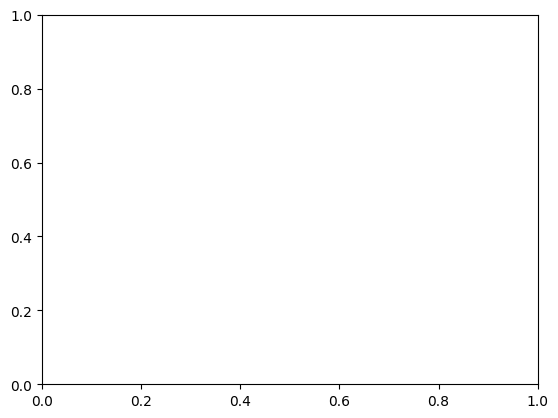

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')

In [25]:
tips.tip.nlargest(5)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
Name: tip, dtype: float64

In [26]:
arr = np.array([1.7, 6, 3, 9.3, 9.5, 7.3, 5.1, -4]).reshape(-1,1)
y_predict_arr = chiziqli.predict(arr)

ValueError: X has 1 features, but LinearRegression is expecting 9 features as input.

In [27]:
nscaler.inverse_transform(y_train[:5])

NameError: name 'nscaler' is not defined

## Support Vector Regressor



In [ ]:
from sklearn.svm import SVR

support_v = SVR(kernel='linear')

In [ ]:
support_v.fit(X_train, y_train)

y_predict_test = support_v.predict(X_test)
y_predict_train = support_v.predict(X_train)

In [ ]:
y_test[:5]

In [ ]:
y_predict_test[:5]

In [ ]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_predict_test)

In [ ]:
from sklearn.metrics import r2_score as r2
r2(y_train, y_predict_train)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_predict_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(y_train, y_predict_train)

In [ ]:
## Decision Tree